# Explorary data analysis

Посмотрим что содержится в нашем наборе данных, что можно из этого извлечь

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_PATH = "https://raw.githubusercontent.com/rzabolotin/ml_team_heart_disease_UCI/master/data/heart.csv"

In [3]:
df = pd.read_csv(DATA_PATH)

# Описание набора данных

In [5]:
print('Набор данных содержит {} строк и {} колонок'.format(*df.shape))

Набор данных содержит 303 строк и 14 колонок


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


В наборе 303 строки и 14 признаков. Пропущенных значений нету.

# Анализ колонок

## Target
Информация о наличии/отсутствии заболевания сердца

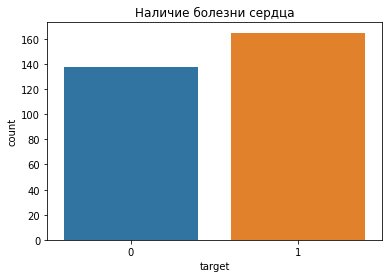

In [15]:
sns.countplot(x=df.target)
plt.title("Наличие болезни сердца")
plt.show()

Можно сказать что выборка сбалансированна. Положительный и отрицательный класс представлены почти поровну.

## Количественные колонки

### Age - возраст

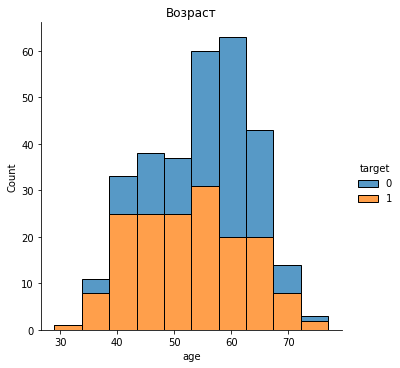

Медианный возврат 55.0


In [21]:
sns.displot(x=df.age, bins=10, hue=df.target, multiple="stack")
plt.title("Возраст")
plt.show() 
print(f"Медианный возврат {df.age.median()}")

Возраст распределен почти нормально, с небольним смещением вправо. Медианный возвраст 55 лет. Значит в выборке представлены в основном старики.

### trestbps

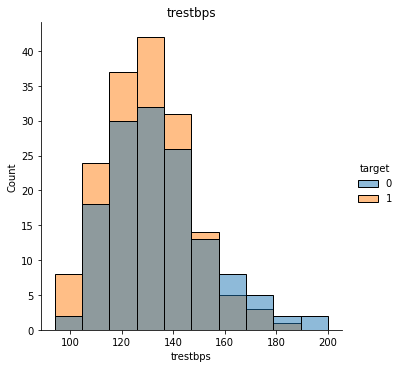

In [13]:
sns.displot(x=df.trestbps, bins=10, hue=df.target)
plt.title("trestbps")
plt.show() 

### chol

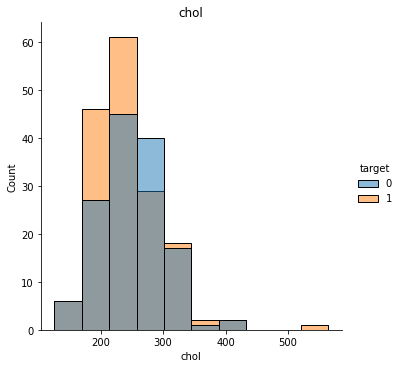

In [22]:
sns.displot(x=df.chol, bins=10, hue=df.target)
plt.title("chol")
plt.show() 

### thalach

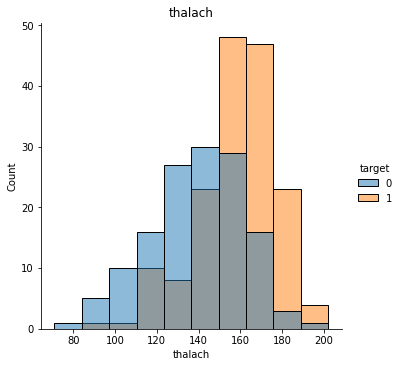

In [23]:
sns.displot(x=df.thalach, bins=10, hue=df.target)
plt.title("thalach")
plt.show() 

### old peak

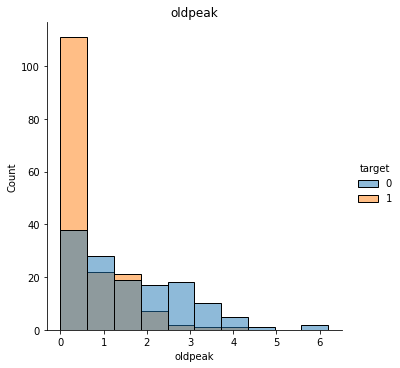

In [24]:
sns.displot(x=df.oldpeak, bins=10, hue=df.target)
plt.title("oldpeak")
plt.show() 

В числовых признаках trestbps, chol и thalach видно ненормальное (скорее лог-нормальное) распределение. Наверное стоит сделать логарифмирование для использования этих фич в дальнейшем. 
На глаз кажется. что oldpeak, thalach - должны хорошо свидетельствовать о наличии болезни

## Категориальные признаки


### Sex - пол

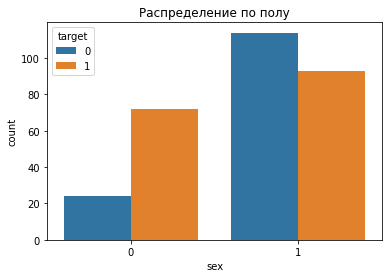

In [ ]:
sns.countplot(x=df.sex, hue=df.target)
plt.title("Распределение по полу")
plt.show()

## Остальные

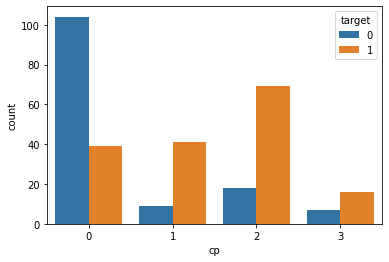

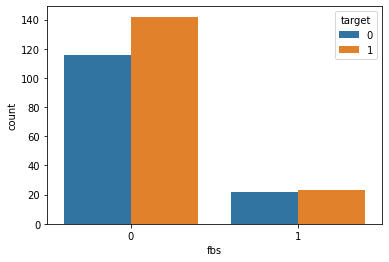

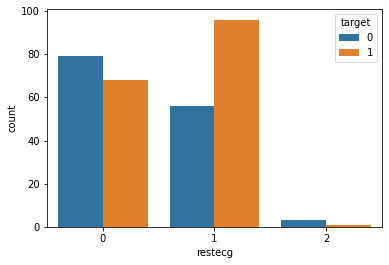

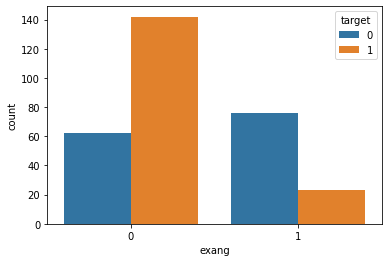

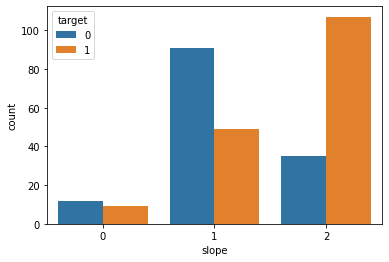

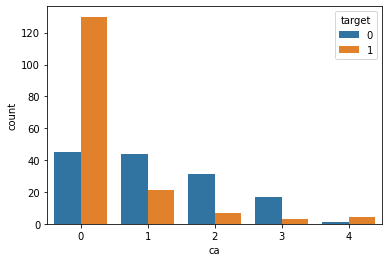

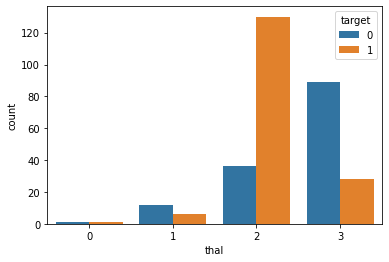

In [ ]:
for column in ["cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]:
  sns.countplot(x=df[column], hue=df.target)
  plt.show()

Есть признаки, которые очень хорошо коррелируют с целевой переменной

## Корреляционный анализ

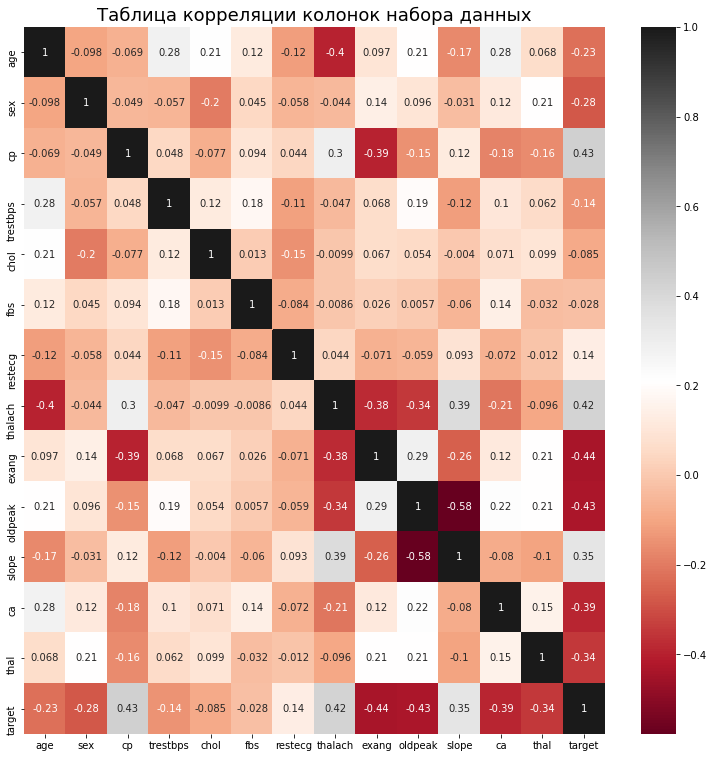

In [29]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corr, annot=True, cmap='RdGy')
plt.title('Таблица корреляции колонок набора данных', fontsize=18)
plt.show()

Из корреляционного аналаиза можно сделать выводы:
* Абсолютно скоррелированых колонок нет.
* Колонки oldpeak и slope сильно коррелируют 0.58
* target наиболее скоррелирован с exang, oldpeak и thalach



## Поиск статистически значимых различий

In [37]:
from itertools import combinations
from scipy.stats import ttest_ind

def find_stat_dif(column_name):
    """
    Ищет статистически значимые отличия в этой колонке
    Если находит, то выводит сообщение на экран
    """
    uniq_values = df[column_name].unique()
    combinations_all = list(combinations(uniq_values, 2))

    for comb in combinations_all:
        A = df[df[column_name] == comb[0]]['target']
        B = df[df[column_name] == comb[1]]['target']

        pvalue = ttest_ind(A, B).pvalue

        if pvalue <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column_name)
            break

In [38]:
categorical_columns = [x for x in df.columns if x not in ['target']]
for column_name in categorical_columns:
    find_stat_dif(column_name)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки cp
Найдены статистически значимые различия для колонки trestbps
Найдены статистически значимые различия для колонки chol
Найдены статистически значимые различия для колонки restecg
Найдены статистически значимые различия для колонки thalach
Найдены статистически значимые различия для колонки exang
Найдены статистически значимые различия для колонки oldpeak
Найдены статистически значимые различия для колонки slope
Найдены статистически значимые различия для колонки ca
Найдены статистически значимые различия для колонки thal


Получается, что по Ttest нашлось 11 факторов оказывающих влияние на target